In [1]:
#Seth Hensley
#801055921
#Homework 3

import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt


(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.cifar10.load_data()

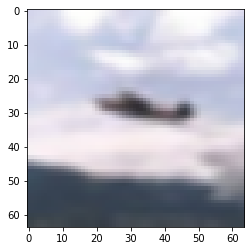

In [2]:
xtrain=tf.image.resize(xtrain,(64,64))
xtest=tf.image.resize(xtest,(64,64))


xtrain = xtrain/255.0

#ytrain = ytrain/255.0

xtest = xtest/255.0

#ytest = ytest/255.0

plt.imshow(xtrain[42069,:,:],cmap='Greys')

In [6]:
def vgg():
    model = tf.keras.Sequential([
        tf.keras.Input(shape = (64,64,3)),
        keras.layers.Conv2D(6, 5, padding = "same"),
        keras.layers.MaxPool2D(2, strides = 2),
        keras.layers.Conv2D(16, 5),
        keras.layers.Activation("relu"),
        keras.layers.MaxPool2D(2, strides = 2),
        keras.layers.Flatten(),
        keras.layers.Dense(120),
        keras.layers.Activation("relu"),
        keras.layers.Dense(84),
        keras.layers.Activation("relu"),
        keras.layers.Dense(10)       
    ])
    
    
    return model

In [7]:
model1 = vgg()



In [8]:
model1.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        2416      
                                                                 
 activation_3 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [9]:

model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
  14/1563 [..............................] - ETA: 1:40 - loss: 2.3212 - accuracy: 0.1004

KeyboardInterrupt: 